# CAU Physical Chemistry 3

## 1. Dirac Delta function

####  Dirac Delta function은 아주 결정적인 함수입니다. 그 어떠한 오차도 허용하지 않지요.  
####  수업에서 여러가지 정의로 소개가 되었는데, 이번 시간에는 Fourier Transform으로 정의된 Dirac Delta 함수를 살펴 볼게요 🫡  
####  먼저 Dirac Delta 함수의 모양은 다음과 같습니다  

In [3]:
# Library 불러오기
import math
import numpy as np
import sympy as sp
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


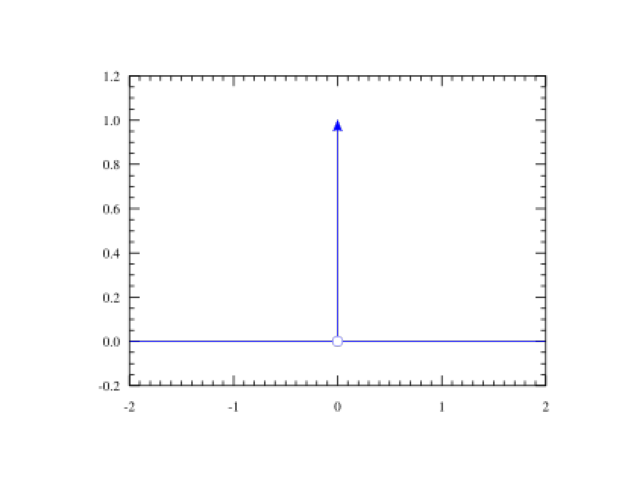

In [158]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 이미지 파일 경로
image_path = r"C:\Users\CDLC_johnh\PhysicalChemistry3\Dirac_distribution_PDF.svg.png"

# 이미지를 로드하고 표시
img = mpimg.imread(image_path)  # 이미지를 읽어옵니다.
plt.figure()
plt.imshow(img)  # 이미지를 표시합니다.
plt.axis('off')  # 축을 숨깁니다.
plt.show()  # 이미지를 표시합니다.

####  함수 정의상  $ x=0 $  에서 무한대의 값을 가져야 합니다. 
####  (수학에서 무한대를 화살표로 표현합니다)

####  Dirac delta 함수의  Fourier Transform으로 정의된 수식은 다음과 같습니다
$ \delta(x-x') = \int_{-\infty}^{\infty} cos k(x-x')dk\ $
####  이를 차근차근 그려보도록 해요!
####  먼저 $ k= 0, 1, 3, 5$ 일 때 5개의 그래프를 하나의 그래프에 겹쳐 그려볼게요

<IPython.core.display.Javascript object>


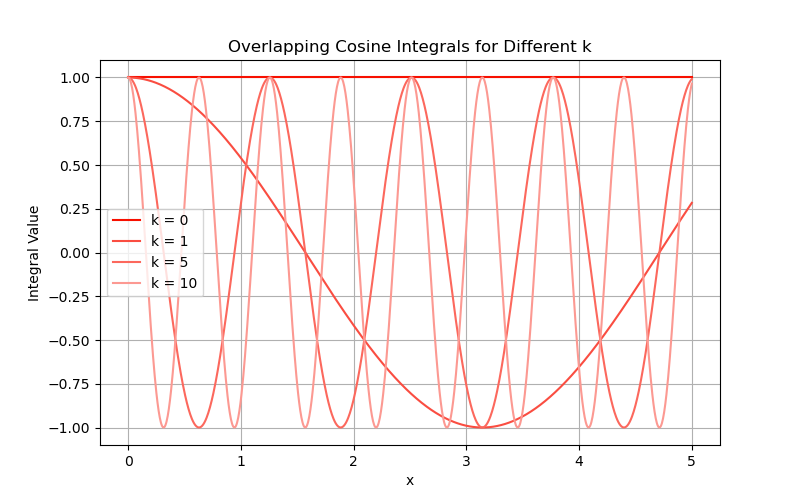

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# X 범위 설정 (0 ~ 5)
x_vals = np.linspace(0, 5, 1000)
x_p = 0  # x' 값 (임의로 0으로 설정)

# 여러 k 값에 대해 적분 그래프 그리기
k_values = [0, 1, 5, 10]  # 여러 주파수 k
colors = ['#f71000', '#fa4d41', '#fc685d','#fc9992']

plt.figure(figsize=(8, 5))

for k, color in zip(k_values, colors):
    y_vals = np.cos(k * (x_vals - x_p))  # 각 k에 대한 cos 함수
    plt.plot(x_vals, y_vals, label=f'k = {k}', color=color)

# 그래프 설정
plt.xlabel("x")
plt.ylabel("Integral Value")
plt.title("Overlapping Cosine Integrals for Different k")
plt.legend()
plt.grid()
plt.show()


#### 이제 0 부터 10까지 양의 정수만 값으로 가지는 k 들을 설정하고, $ \sum_{k=0}^{10} cos k(x-x')\ $ 를 그려보겠습니다
#### 편의상 $ x'=0 $ 으로 설정하였습니다

<IPython.core.display.Javascript object>


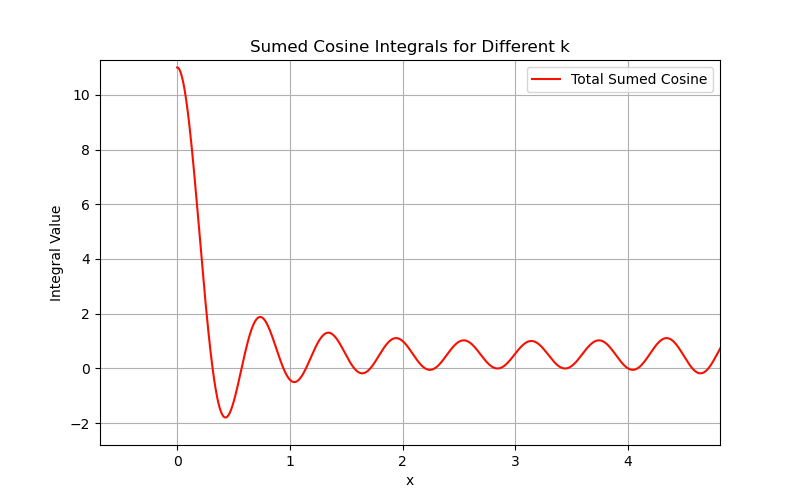

In [74]:
x_vals = np.linspace(0, 5, 1000)
x_prime = 0  # x' 값 (임의로 0으로 설정)

# 여러 k 값에 대해 적분 그래프 그리기
k_values = np.arange(0,11)  # 여러 주파수 k

plt.figure(figsize=(8, 5))

# y_vals는 k값들을 반복하며 각 cos(k * (x_vals - x_prime))을 합산합니다.
y_vals = np.zeros_like(x_vals)
for k in k_values:
    y_vals += np.cos(k * (x_vals - x_prime))

# 그래프 그리기
plt.plot(x_vals, y_vals, label='Total Sumed Cosine', color='#f71000')

# 그래프 설정
plt.xlabel("x")
plt.ylabel("Integral Value")
plt.title("Sumed Cosine Integrals for Different k")
plt.legend()
plt.grid()
plt.show()


#### Dirac Delta 함수와 비슷하게 생겨지는게 보이시나요? 😆
#### 이번에는 0 부터 100까지 양의 정수만 값으로 가지는 k 들을 설정하고, $ \sum_{k=0}^{100} cos k(x-x')\ $ 를 그려보겠습니다

<IPython.core.display.Javascript object>


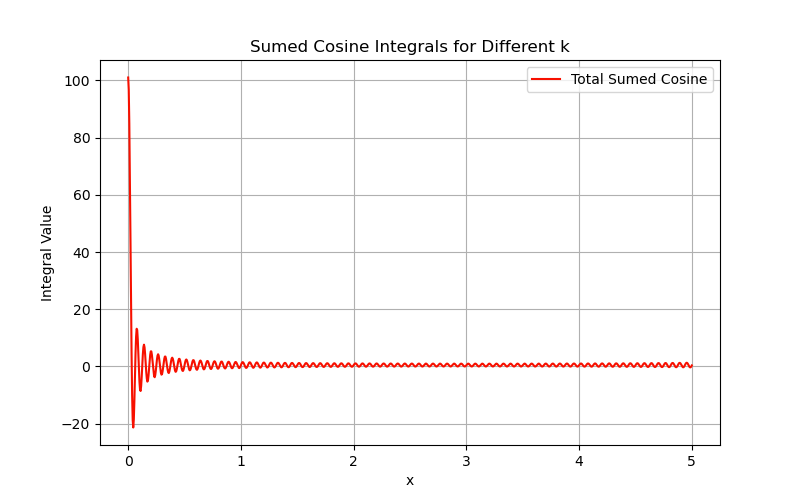

In [75]:
x_vals = np.linspace(0, 5, 1000)
x_prime = 0  # x' 값 (임의로 0으로 설정)

# 여러 k 값에 대해 적분 그래프 그리기
k_values = np.arange(0,101)  # 여러 주파수 k

plt.figure(figsize=(8, 5))

# y_vals는 k값들을 반복하며 각 cos(k * (x_vals - x_prime))을 합산합니다.
y_vals = np.zeros_like(x_vals)
for k in k_values:
    y_vals += np.cos(k * (x_vals - x_prime))

# 그래프 그리기
plt.plot(x_vals, y_vals, label='Total Sumed Cosine', color='#f71000')

# 그래프 설정
plt.xlabel("x")
plt.ylabel("Integral Value")
plt.title("Sumed Cosine Integrals for Different k")
plt.legend()
plt.grid()
plt.show()


#### 결과는 $ x=x'(=0) $ 에서만 보강간섭이 일어나 계속 값이 1씩 더해지고, 나머지 위치에서는 모두 상쇄 간섭으로 없어진다는 것 입니다.
#### 따라서 k 가 0 부터 $\infty$까지 더해질때 완벽한 Dirac delta 함수가 나오게 됩니다!

-----

## 2. Taylor's Expansion

#### Taylor's Expansion  ( 혹은 Taylor's Series ) 는 이론화학에서 매우매우 중요한 도구입니다

#### $ f(x) $ 라는 미분가능함수가 있다고 가정해봅시다. ( 이를 수학적으로 analytic하다고 합니다 )

#### 문제는 우리가 설정한 $ f(x) $ 가 어떻게 생겨먹었는지, 수식적으로는 어떻게 표현되는지 모른다는 것이지요.

#### 이럴때 유용하게 사용할 수 있는 도구가 Taylor's Expasion입니다. 우리가 잘 알고 있는 Polynomials (다항함수)로 근사하여 표현 할 수 있기 때문입니다.
#### → 다항함수이니 미분하기도 굉장히 편하겠죠?

## Taylor's Expansion
## $ f(x) = \sum_{k=0}^\infty \left.\frac{\partial^k f}{\partial x^k}\right|_{x=a} \frac{(x-a)^k}{k!}$

#### 위의 식은 임의의 analytic 함수 $ f(x) $를  $ x=a $ 주변에서 Taylor Expansion한 식입니다. (정의)

#### $ x=0 $일때 expansion 한 것을 특별하게 이름을 붙여 Maclaurin's series 라고 합니다 ( 그저 이름일 뿐입니다~ )
## Maclaurin's Series
## $ f(x) = \sum_{k=0}^\infty \left.\frac{\partial^k f}{\partial x^k}\right|_{x=0} \frac{x^k}{k!}$

#### 자, 이제 그럼 $ f(x) = e^x $ 인 경우를 생각해봅시다. 

#### 사실 우리 멋진 학생분들은 $ e^x $가 어떻게 생겼는지 다들 아실 터이지만, 모른다고 해보자구요

#### $ f(x) = e^x $ 함수를 $ x=0 $ 근처에서 Taylor's Expansion 해보겠습니다.

## $ f(x) = \left.\frac{\partial^0 (e^x)}{\partial x^0}\right|_{x=0} \frac{x^0}{0!} + \left.\frac{\partial^1 (e^x)}{\partial x^1}\right|_{x=0} \frac{x^1}{1!} + \left.\frac{\partial^2 (e^x)}{\partial x^2}\right|_{x=0} \frac{x^2}{2!} + \left.\frac{\partial^3 (e^x)}{\partial x^3}\right|_{x=0} \frac{x^3}{3!} + \left.\frac{\partial^4 (e^x)}{\partial x^4}\right|_{x=0} \frac{x^4}{4!} + \cdots$

## $ f(x) ={1} + \frac{1}{1} x + \frac{1}{2}x^2 +\frac{1}{6}x^3 + \frac{1}{24}x^4 + \cdots$

#### 그림으로 하나씩 살펴볼까요?

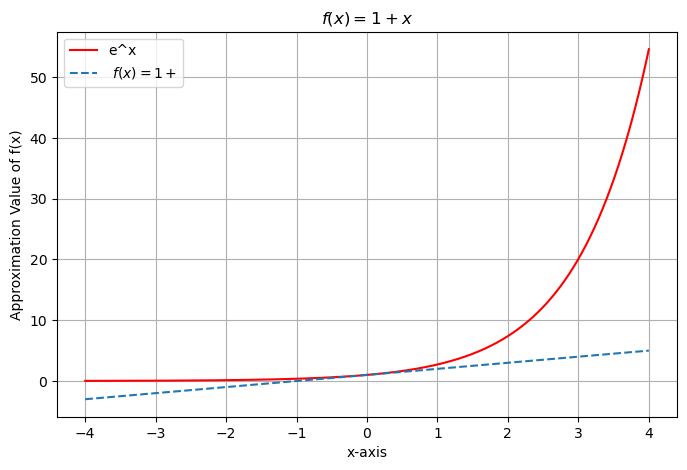

In [18]:
x_vals = np.linspace(-4,4, 10000)
y_vals = 1 + (x_vals)

plt.figure(figsize=(8, 5))

plt.plot(x_vals, np.exp(x_vals), 'r', label="e^x")
plt.plot(x_vals,y_vals,'--', label=' $ f(x) ={1} + \frac{1}{1} x $')

plt.xlabel('x-axis')
plt.ylabel('Approximation Value of f(x)')
plt.title('$ f(x) ={1} + x $')
plt.legend()
plt.grid()
plt.show()

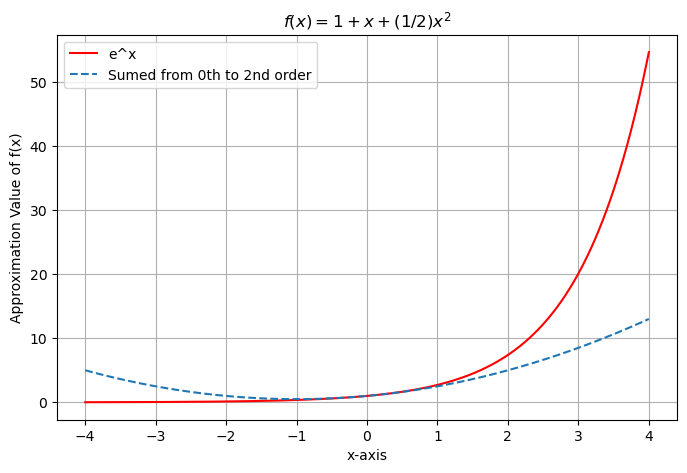

In [17]:
x_vals = np.linspace(-4,4, 10000)
y_vals = 1 + (x_vals) + (1/2) * ((x_vals)**2)

plt.figure(figsize=(8, 5))

plt.plot(x_vals, np.exp(x_vals), 'r', label="e^x")
plt.plot(x_vals,y_vals,'--', label='Sumed from 0th to 2nd order')

plt.xlabel('x-axis')
plt.ylabel('Approximation Value of f(x)')
plt.title('$ f(x) ={1} + x + (1/2)x^2$')
plt.legend()
plt.grid()
plt.show()

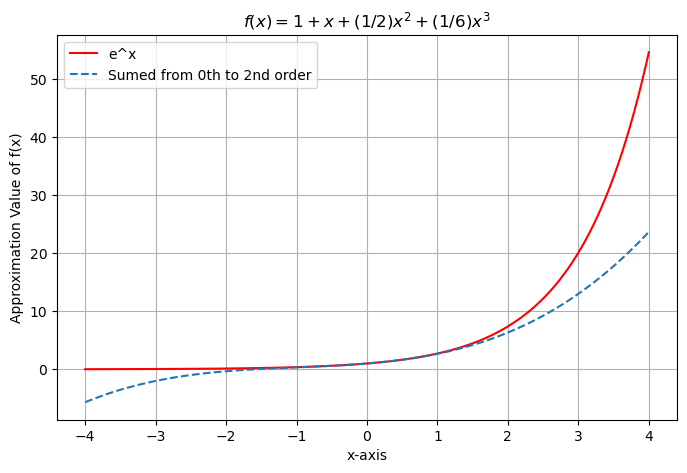

In [16]:
x_vals = np.linspace(-4,4, 10000)
y_vals = 1 + (x_vals) + (1/2) * ((x_vals)**2) + (1/6) * ((x_vals)**3)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, np.exp(x_vals), 'r', label="e^x")
plt.plot(x_vals,y_vals, '--',label='Sumed from 0th to 2nd order')

plt.xlabel('x-axis')
plt.ylabel('Approximation Value of f(x)')
plt.title('$ f(x) ={1} + x + (1/2)x^2 + (1/6)x^3$')
plt.legend()
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


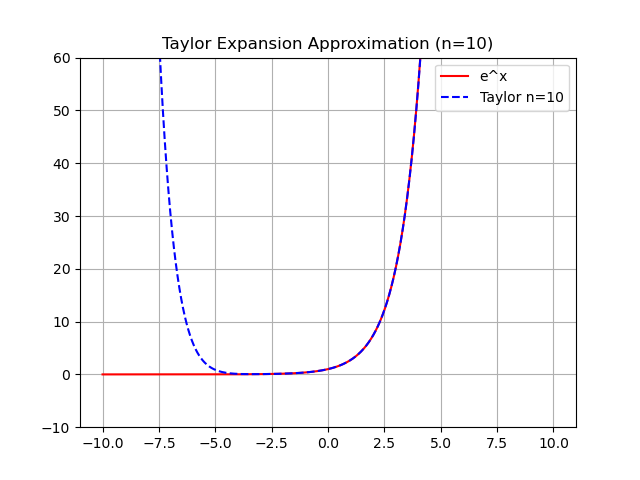

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [93]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 그래프 그릴 범위 설정
x = np.linspace(-10, 10, 1000)

# 실제 함수 (예: e^x)
def actual_function(x):
    return np.exp(x)

# 테일러 급수 전개 함수
def taylor_expansion(x, n):
    result = np.zeros_like(x)
    for k in range(n+1):
        result += (x**k) / np.math.factorial(k)
    return result

# 애니메이션 업데이트 함수
def update(frame):
    ax.clear()
    ax.set_ylim(-10, 60)  # y축 고정 (x 범위가 넓을 경우 필요)
    ax.plot(x, actual_function(x), 'r', label="e^x")  # 원래 함수
    ax.plot(x, taylor_expansion(x, frame), 'b--', label=f"Taylor n={frame}")  # 테일러 근사
    ax.legend()
    ax.set_title(f"Taylor Expansion Approximation (n={frame})")
    ax.grid(True)  # 그리드 추가

# 애니메이션 설정
fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, update, frames=20, interval=500, repeat=False, blit=False)

plt.legend()
plt.grid()
plt.show()



#### 이것이 바로 Taylor's Expansion 입니다 😊😊

-----

## 3. Uncertainty Principle

#### 불확정성의 원리는 conjugate variables들에 대하여 두 변수의 값을 동시에 100 %의 accuracy로 측정할 수 없다는 내용을 담고있습니다

#### 예를들어 입자의 '위치' (position)와 '운동량' (momentum = $m \cdot v$)이 서로 conjugate variables 관계에 있고, 100 %의 accuracy로 측정을 할 수 없습니다.

#### 이 글을 통하여 전하고 싶은 것은, 수학적으로 왜 그래야하는지 보여드리는 것입니다 🫡

#### Let's dive in !

> Quantum Physics Hypothesis 1 : 모든 물리적 정보는 파동함수라는 벡터에 담겨 있다

#### 위는 양자역학에서 가장 기초가되는 가정입니다. 따라서 우리는 벡터를 잘 가지고 놀 줄 알아야하는데요, 간단한 부등식에 의해 불확정성 원리를 도출할 수 있습니다. 먼저, 다음과 같은 양을 쳐다봅시다.

## $ {\displaystyle \sigma _{x}^{2}=\int _{-\infty }^{\infty }x^{2}\cdot |\psi (x)|^{2}\,dx-\left(\int _{-\infty }^{\infty }x\cdot |\psi (x)|^{2}\,dx\right)^{2}} $

## $ {\displaystyle \sigma _{p}^{2}=\int _{-\infty }^{\infty }p^{2}\cdot |\varphi (p)|^{2}\,dp-\left(\int _{-\infty }^{\infty }p\cdot |\varphi (p)|^{2}\,dp\right)^{2}~.} $

#### $ \displaystyle \sigma _{x}^{2} $ 과 $ \displaystyle \sigma _{p}^{2} $ 은 각각 위치와 운동량의 분산입니다. 다시 말해 해당 값을 확신하지 못하는 정도죠.

#### 식의 편의를 위해 위치와 운동량 각각의 평균값이 0이라고 쳐보죠 그럼 식은 다음과 같이 됩니다.

## $ {\displaystyle \sigma _{x}^{2}=\int _{-\infty }^{\infty }x^{2}\cdot |\psi (x)|^{2}\,dx} $

## $ {\displaystyle \sigma _{p}^{2}=\int _{-\infty }^{\infty }p^{2}\cdot |\varphi (p)|^{2}\,dp = \int_{-\infty }^{\infty }\left(-i\hbar {\frac {d}{dx}}\right)^{2}\cdot | \psi (x)|^{2}\,dx} $

#### 식을 깔끔하게 쓰기 위해, $ {\displaystyle f(x)=x\cdot \psi (x)} $라 정의하고, ${\displaystyle {{g}}(x)=\left(-i\hbar {\frac {d}{dx}}\right)\cdot \psi (x)}$ 라고 정의 해 두겠습니다. 이를 Bra-Ket notation으로 쓰게 되면,

## ${\displaystyle \sigma _{x}^{2}=\int _{-\infty }^{\infty }|f(x)|^{2}\,dx=\langle f\mid f\rangle }$

## $ {\displaystyle \sigma _{p}^{2}=\int _{-\infty }^{\infty }|{\tilde {g}}(p)|^{2}\,dp=\int _{-\infty }^{\infty }|g(x)|^{2}\,dx=\langle g\mid g\rangle .} $

#### Cauchy-Schwarz inequality 관계에 의해 다음 식이 성립합니다!

## ${\displaystyle \sigma _{x}^{2}\sigma _{p}^{2}=\langle f\mid f\rangle \cdot \langle g\mid g\rangle \geq |\langle f\mid g\rangle |^{2}~} $

####  하나 더 고려하자면, Complex number (복소수)를 다룰 때에 다음과 같은 식이 항상 성립합니다!!

## $ {\displaystyle |z|^{2}={\Big (}{\text{Re}}(z){\Big )}^{2}+{\Big (}{\text{Im}}(z){\Big )}^{2}\geq {\Big (}{\text{Im}}(z){\Big )}^{2}=\left({\frac {z-z^{\ast }}{2i}}\right)^{2}.} $

## ${\displaystyle \sigma _{x}^{2}\sigma _{p}^{2}=\langle f\mid f\rangle \cdot \langle g\mid g\rangle \geq |\langle f\mid g\rangle |^{2}~ \geq \left({\frac {\langle f\mid g\rangle -\langle g\mid f\rangle }{2i}}\right)^{2}} $

#### 남은것은 계산뿐입니다~!

## $ {\displaystyle {\begin{aligned}\langle f\mid g\rangle -\langle g\mid f\rangle &=\int _{-\infty }^{\infty }\psi ^{*}(x)\,x\cdot \left(-i\hbar {\frac {d}{dx}}\right)\,\psi (x)\,dx-\int _{-\infty }^{\infty }\psi ^{*}(x)\,\left(-i\hbar {\frac {d}{dx}}\right)\cdot x\,\psi (x)\,dx\\&=i\hbar \cdot \int _{-\infty }^{\infty }\psi ^{*}(x)\left[\left(-x\cdot {\frac {d\psi (x)}{dx}}\right)+{\frac {d(x\psi (x))}{dx}}\right]\,dx\\&=i\hbar \cdot \int _{-\infty }^{\infty }\psi ^{*}(x)\left[\left(-x\cdot {\frac {d\psi (x)}{dx}}\right)+\psi (x)+\left(x\cdot {\frac {d\psi (x)}{dx}}\right)\right]\,dx\\&=i\hbar \cdot \int _{-\infty }^{\infty }\psi ^{*}(x)\psi (x)\,dx\\&=i\hbar \cdot \int _{-\infty }^{\infty }|\psi (x)|^{2}\,dx\\&=i\hbar \end{aligned}}} $

#### 따라서 위치의 불확실성과 운동량의 불확실성을 곱한 값은 항상 어떤 상수 이상의 값을 가져야 합니다!!

## $ {\displaystyle \sigma _{x}^{2}\sigma _{p}^{2}\geq |\langle f\mid g\rangle |^{2}\geq \left({\frac {\langle f\mid g\rangle -\langle g\mid f\rangle }{2i}}\right)^{2}=\left({\frac {i\hbar }{2i}}\right)^{2}={\frac {\hbar ^{2}}{4}}} $

## $ {\displaystyle \sigma _{x}\sigma _{p}\geq {\frac {\hbar }{2}}~.} $

#### 이 관계를 Uncertainty Principle이라 말합니다 😊😊

----

## 4. Determinant

#### 과학자들과 수학자들은 tidious한 일들을 좋아하지 않습니다. (단순 반복 작업이나, 지루한 수학계산같은 것들이요)

#### 수많은 일차방정식을 풀어야한다면 그게 바로 스트레스일 것입니다 🥹🥹

## $ {\displaystyle {\begin{aligned}a_{1,1}x_{1}+a_{1,2}x_{2}+&\cdots +a_{1,n}x_{n}=b_{1}\\&\ \ \vdots \\a_{m,1}x_{1}+a_{m,2}x_{2}+&\cdots +a_{m,n}x_{n}=b_{m}\end{aligned}}} $

#### 방정식들을 간단히 그 계수들의 집합으로 나타낸 것이 행렬이라 할 수 있겠습니다

## $ {\displaystyle \mathbf {A\cdot x} ={\begin{pmatrix}a_{11}&a_{12}&\cdots &a_{1n}\\a_{21}&a_{22}&\cdots &a_{2n}\\\vdots &\vdots &\ddots &\vdots \\a_{m1}&a_{m2}&\cdots &a_{mn}\end{pmatrix}}\cdot{\begin{pmatrix}x_{1}\\x_{2}\\ \vdots\\x_{n} \end{pmatrix} } = {\begin{pmatrix}b_{1}\\b_{2}\\ \vdots\\b_{n} \end{pmatrix} } =\mathbf {b} } $

#### 여기서 계수들은 a 와 b 들을 말하고 x는 우리가 풀어야할 변수입니다.

#### 벡터들의 입장에서 위 식을 살펴 볼까요?
####  ➡️ $ \mathbf {x} $ 벡터에게 $ \mathbf {A} $라는 행렬을 가했더니 $ \mathbf {b} $라는 벡터로 변했습니다!!

#### 따라서 우리는 $ \mathbf {A} $가 어떠한 연산자라는 것을 알 수 있습니다. 
#### 그리고 이는 양자세계에서 얼마든지 적용될 수 있습니다. (파동함수는 모든 physical 정보를 담고 있는 '벡터'니까요~)

## $ {\displaystyle |A \rangle \langle A |\cdot |\psi(x) \rangle \mapsto |A \rangle \langle A |\psi(x) \rangle~ = x \cdot |\psi(x) \rangle = |b \rangle.}
 $

#### 이제 우리가 관심이 있는 행렬은  $ \mathbf {A} $ 행렬일 것이고, $ \mathbf {A} $의 성질을 잘 아는 것이 중요하게 됩니다. 😆😆

----

## Determinant of  $ 2 \times 2 $ matrix

## $ {\displaystyle | \mathbf {A}| = {\begin{vmatrix}a&b\\c&d\end{vmatrix}}=ad-bc,} $

#### Determinant라는 양은 square matrix의 성질을 나타내는 scalar양입니다.

#### Determinant라는 양을 통해 벡터에게 어떤 변환을 가했는지 스칼라 값 하나로 감을 잡을 수 있지요

#### 이번 글을 통해 Determinant의 기하학적 의미를 보여드리려고 합니다, 다음과 같은 행렬을 생각해 보아요!

## $ {\begin{pmatrix} 2&1\\0&1\end{pmatrix}} \cdot {\begin{pmatrix} 1&0 \\0&1\end{pmatrix}} = {\begin{pmatrix} 2&1\\0&1\end{pmatrix}}$

#### $ {\begin{pmatrix} 2&1\\0&1\end{pmatrix}} $ 행렬은 단위행렬의 단위벡터들을 각각 (2,0), (1,1)로 변화하도록 연산중입니다 😊😊

<IPython.core.display.Javascript object>


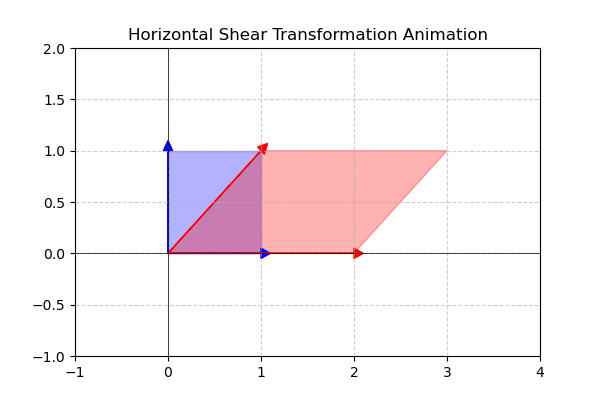

In [141]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Polygon

# 원래 단위 벡터
unit_vectors = np.array([[1, 0], [0, 1]])

# 설정
fig, ax = plt.subplots(figsize=(6,4))
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 2)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(True, linestyle='--', alpha=0.6)

# 원래 벡터 평행사변형 (연한 파란색)
original_polygon = Polygon(
    [[0, 0], [1, 0], [1, 1], [0, 1]], 
    color='blue', alpha=0.3
)
ax.add_patch(original_polygon)

# 변형된 벡터 평행사변형 (연한 빨간색) → 초기에는 (0,0)
transformed_polygon = Polygon(
    [[0, 0], [0, 0], [0, 0], [0, 0]], 
    color='red', alpha=0.3
)
ax.add_patch(transformed_polygon)

# 벡터 화살표 초기화
original_arrows = [
    ax.arrow(0, 0, unit_vectors[0, i], unit_vectors[1, i], 
             head_width=0.1, head_length=0.1, fc='blue', ec='blue') 
    for i in range(2)
]
transformed_arrows = [
    ax.arrow(0, 0, 0, 0, head_width=0.1, head_length=0.1, fc='red', ec='red') 
    for _ in range(2)
]

# 애니메이션 업데이트 함수
def update(frame):
    m = frame / 20 * 1  # shear factor 변화 (0 → 1.25)
    shear_matrix = np.array([[1+m, m], [0, 1]])
    transformed_vectors = shear_matrix @ unit_vectors
    
    # 변형된 벡터 업데이트
    for i in range(2):
        transformed_arrows[i].remove()
        transformed_arrows[i] = ax.arrow(
            0, 0, transformed_vectors[0, i], transformed_vectors[1, i],
            head_width=0.1, head_length=0.1, fc='red', ec='red'
        )
    
    # 변형된 평행사변형 업데이트
    new_polygon = np.array([
        [0, 0], 
        transformed_vectors[:, 0], 
        transformed_vectors[:, 0] + transformed_vectors[:, 1], 
        transformed_vectors[:, 1]
    ])
    transformed_polygon.set_xy(new_polygon)

# 애니메이션 실행
ani = animation.FuncAnimation(fig, update, frames=21, interval=100, repeat=False)

plt.title("Horizontal Shear Transformation Animation")
plt.show()


#### 다른 행렬곱도 생각해볼까요?

## $ {\begin{pmatrix} -1&0\\0&1\end{pmatrix}} \cdot {\begin{pmatrix} 1&0 \\0&1\end{pmatrix}} = {\begin{pmatrix} -1&0\\0&1\end{pmatrix}}$

<IPython.core.display.Javascript object>


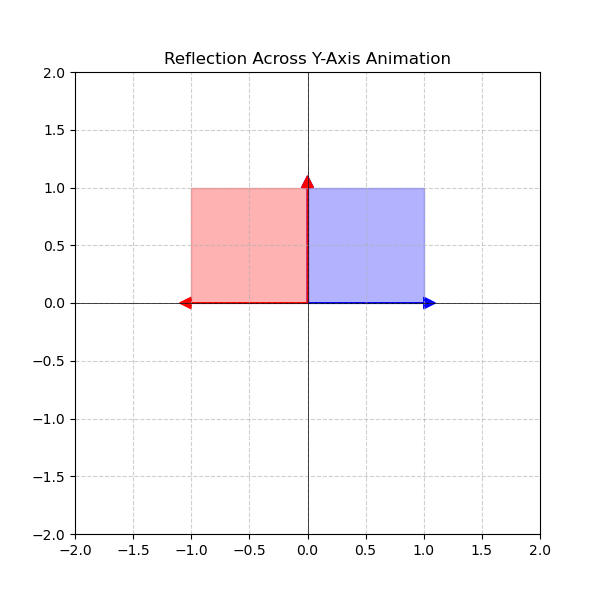

In [137]:
##%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Polygon


# 원래 단위 벡터
unit_vectors = np.array([[1, 0], [0, 1]])

# 변환 행렬 (y축 대칭)
reflection_matrix = np.array([[-1, 0], [0, 1]])

# 설정
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(True, linestyle='--', alpha=0.6)

# 원래 평행사변형 (연한 파란색)
original_polygon = Polygon(
    [[0, 0], [1, 0], [1, 1], [0, 1]], 
    color='blue', alpha=0.3
)
ax.add_patch(original_polygon)

# 변형된 평행사변형 (연한 빨간색) → 초기에는 원래와 동일
transformed_polygon = Polygon(
    [[0, 0], [1, 0], [1, 1], [0, 1]], 
    color='red', alpha=0.3
)
ax.add_patch(transformed_polygon)

# 벡터 화살표 초기화
original_arrows = [
    ax.arrow(0, 0, unit_vectors[0, i], unit_vectors[1, i], 
             head_width=0.1, head_length=0.1, fc='blue', ec='blue') 
    for i in range(2)
]
transformed_arrows = [
    ax.arrow(0, 0, unit_vectors[0, i], unit_vectors[1, i],
             head_width=0.1, head_length=0.1, fc='red', ec='red') 
    for i in range(2)
]

# 애니메이션 업데이트 함수
def update(frame):
    alpha = frame / 20  # 변화 정도 (0 → 1)
    transformation_matrix = np.array([
        [(1 - 2*(alpha)), 0],  # 점진적으로 -1로 변화
        [0, 1]
    ])
    transformed_vectors = transformation_matrix @ unit_vectors
    
    # 변형된 벡터 업데이트
    for i in range(2):
        transformed_arrows[i].remove()
        transformed_arrows[i] = ax.arrow(
            0, 0, transformed_vectors[0, i], transformed_vectors[1, i],
            head_width=0.1, head_length=0.1, fc='red', ec='red'
        )
    
    # 변형된 평행사변형 업데이트
    new_polygon = np.array([
        [0, 0], 
        transformed_vectors[:, 0], 
        transformed_vectors[:, 0] + transformed_vectors[:, 1], 
        transformed_vectors[:, 1]
    ])
    transformed_polygon.set_xy(new_polygon)

# 애니메이션 실행
ani = animation.FuncAnimation(fig, update, frames=21, interval=100, repeat=False)


plt.title("Reflection Across Y-Axis Animation")
plt.show()


#### 회전도 해봅시다!!

## $ {\displaystyle {\begin{pmatrix}\cos \left({\frac {\pi }{6}}\right)&-\sin \left({\frac {\pi }{6}}\right)\\\sin \left({\frac {\pi }{6}}\right)&\cos \left({\frac {\pi }{6}}\right)\end{pmatrix}}\cdot {\begin{pmatrix} 1&0 \\0&1\end{pmatrix}} = {\begin{pmatrix}\cos \left({\frac {\pi }{6}}\right)&-\sin \left({\frac {\pi }{6}}\right)\\\sin \left({\frac {\pi }{6}}\right)&\cos \left({\frac {\pi }{6}}\right)\end{pmatrix}}}$

<IPython.core.display.Javascript object>


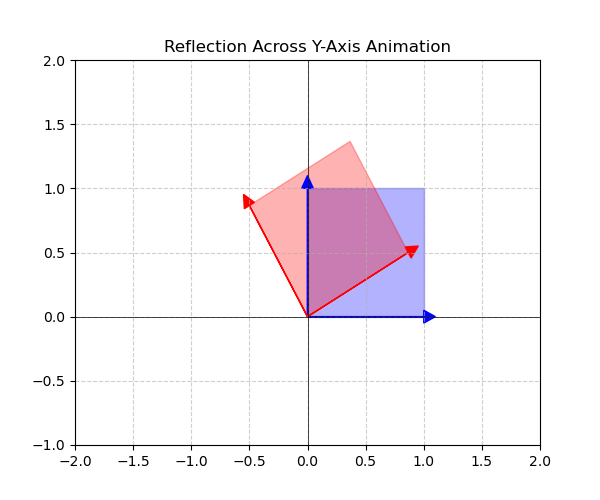

In [159]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Polygon

# 원래 단위 벡터
unit_vectors = np.array([[1, 0], [0, 1]])

# 변환 행렬 (y축 대칭)
reflection_matrix = np.array([[-1, 0], [0, 1]])

# 설정
fig, ax = plt.subplots(figsize=(6,5))
ax.set_xlim(-2, 2)
ax.set_ylim(-1, 2)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(True, linestyle='--', alpha=0.6)

# 원래 평행사변형 (연한 파란색)
original_polygon = Polygon(
    [[0, 0], [1, 0], [1, 1], [0, 1]], 
    color='blue', alpha=0.3
)
ax.add_patch(original_polygon)

# 변형된 평행사변형 (연한 빨간색) → 초기에는 원래와 동일
transformed_polygon = Polygon(
    [[0, 0], [1, 0], [1, 1], [0, 1]], 
    color='red', alpha=0.3
)
ax.add_patch(transformed_polygon)

# 벡터 화살표 초기화
original_arrows = [
    ax.arrow(0, 0, unit_vectors[0, i], unit_vectors[1, i], 
             head_width=0.1, head_length=0.1, fc='blue', ec='blue') 
    for i in range(2)
]
transformed_arrows = [
    ax.arrow(0, 0, unit_vectors[0, i], unit_vectors[1, i],
             head_width=0.1, head_length=0.1, fc='red', ec='red') 
    for i in range(2)
]

# 애니메이션 업데이트 함수
def update(frame):
    alpha = frame / 20  # 변화 정도 (0 → 1)
    transformation_matrix = np.array([
        [ (1 - (1-math.cos(np.pi/6))*(alpha)),-(math.sin(np.pi/6))*(alpha)],  # 점진적으로 -1로 변화
        [(math.sin(np.pi/6))*(alpha),(1 - (1-math.cos(np.pi/6))*(alpha))]
    ])
    transformed_vectors = transformation_matrix @ unit_vectors
    
    # 변형된 벡터 업데이트
    for i in range(2):
        transformed_arrows[i].remove()
        transformed_arrows[i] = ax.arrow(
            0, 0, transformed_vectors[0, i], transformed_vectors[1, i],
            head_width=0.1, head_length=0.1, fc='red', ec='red'
        )
    
    # 변형된 평행사변형 업데이트
    new_polygon = np.array([
        [0, 0], 
        transformed_vectors[:, 0], 
        transformed_vectors[:, 0] + transformed_vectors[:, 1], 
        transformed_vectors[:, 1]
    ])
    transformed_polygon.set_xy(new_polygon)

# 애니메이션 실행
ani = animation.FuncAnimation(fig, update, frames=21, interval=100, repeat=False)


plt.title("Reflection Across Y-Axis Animation")
plt.show()


#### 이번엔 하나의 벡터로 겹쳐볼게요

## $ {\begin{pmatrix} 2&2\\1&1\end{pmatrix}} \cdot {\begin{pmatrix} 1&0 \\0&1\end{pmatrix}} = {\begin{pmatrix} 2&2\\1&1\end{pmatrix}}$

<IPython.core.display.Javascript object>


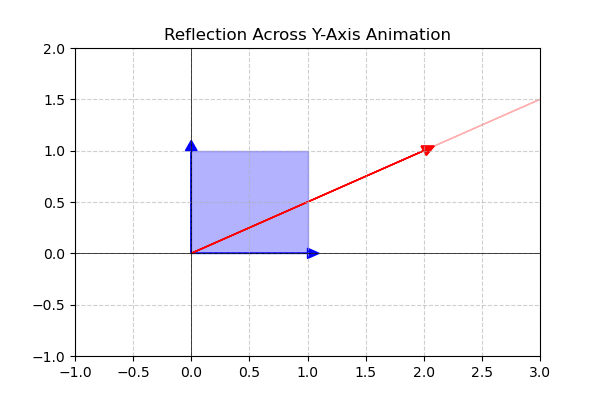

In [160]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Polygon


# 원래 단위 벡터
unit_vectors = np.array([[1, 0], [0, 1]])

# 변환 행렬 (y축 대칭)
reflection_matrix = np.array([[-1, 0], [0, 1]])

# 설정
fig, ax = plt.subplots(figsize=(6,4))
ax.set_xlim(-1, 3)
ax.set_ylim(-1, 2)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(True, linestyle='--', alpha=0.6)

# 원래 평행사변형 (연한 파란색)
original_polygon = Polygon(
    [[0, 0], [1, 0], [1, 1], [0, 1]], 
    color='blue', alpha=0.3
)
ax.add_patch(original_polygon)

# 변형된 평행사변형 (연한 빨간색) → 초기에는 원래와 동일
transformed_polygon = Polygon(
    [[0, 0], [1, 0], [1, 1], [0, 1]], 
    color='red', alpha=0.3
)
ax.add_patch(transformed_polygon)

# 벡터 화살표 초기화
original_arrows = [
    ax.arrow(0, 0, unit_vectors[0, i], unit_vectors[1, i], 
             head_width=0.1, head_length=0.1, fc='blue', ec='blue') 
    for i in range(2)
]
transformed_arrows = [
    ax.arrow(0, 0, unit_vectors[0, i], unit_vectors[1, i],
             head_width=0.1, head_length=0.1, fc='red', ec='red') 
    for i in range(2)
]

# 애니메이션 업데이트 함수
def update(frame):
    alpha = frame / 20  # 변화 정도 (0 → 1)
    transformation_matrix = np.array([
        [1+(alpha),2*(alpha)],  # 점진적으로 -1로 변화
        [(alpha),1]
    ])
    transformed_vectors = transformation_matrix @ unit_vectors
    
    # 변형된 벡터 업데이트
    for i in range(2):
        transformed_arrows[i].remove()
        transformed_arrows[i] = ax.arrow(
            0, 0, transformed_vectors[0, i], transformed_vectors[1, i],
            head_width=0.1, head_length=0.1, fc='red', ec='red'
        )
    
    # 변형된 평행사변형 업데이트
    new_polygon = np.array([
        [0, 0], 
        transformed_vectors[:, 0], 
        transformed_vectors[:, 0] + transformed_vectors[:, 1], 
        transformed_vectors[:, 1]
    ])
    transformed_polygon.set_xy(new_polygon)

# 애니메이션 실행
ani = animation.FuncAnimation(fig, update, frames=21, interval=100, repeat=False)


plt.title("Reflection Across Y-Axis Animation")
plt.show()


#### 행렬곱 연산을 그림으로 이해해 보았는데요, determinant의 의미가 무엇인지 눈치채셨나요?

### ${\begin{vmatrix} 2&1\\0&1\end{vmatrix}} = 2-0 = 2 $

### $ {\begin{vmatrix} -1&0\\0&1\end{vmatrix}} = -1 -0 =-1$

### $ {\begin{vmatrix}\cos \left({\frac {\pi }{6}}\right)&-\sin \left({\frac {\pi }{6}}\right)\\\sin \left({\frac {\pi }{6}}\right)&\cos \left({\frac {\pi }{6}}\right)\end{vmatrix}} = \cos^2(6/\pi)+\sin^2(6/\pi) =1$

### $ {\begin{vmatrix} 2&2\\1&1\end{vmatrix}} = 2-2 = 0 $

#### 네, Determinant는 바로 변환 후 기저벡터가 이루는 격자의 넓이변화를 뜻합니다

## $ |A \rangle \langle A |\psi(x) \rangle~ = x \cdot |\psi(x) \rangle $

#### 위와 같은 식은 Eigenvalue equation이라 하는데요, $\psi(x) $라는 벡터에  $ |A \rangle \langle A | $라는 행렬을 가해도 벡터의 방향은 바뀌지 않고 실수배로 변하는 관계식을 말합니다

#### 가하는 행렬을 '관측'에 해당한다 볼 수 있고, 관측되는 벡터를 '대상'이라고 말 할  수 있겠습니다 😊👍

----

## 5. Hooke's Law

#### Hooke's Law는 경험적인 법칙으로서 인장력에 대한 힘을 model한 법칙입니다.

#### 예를들어 스프링을 당기고 있다고 해보죠! (당기는 힘 외에는 어떠한 외력도 없습니다)

<IPython.core.display.Javascript object>


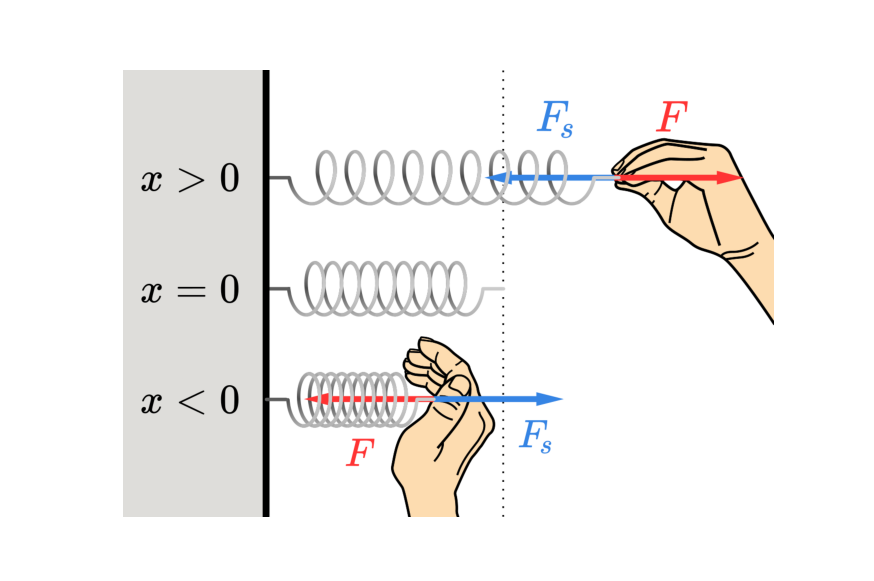

In [157]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 이미지 파일 경로
image_path = r"C:\Users\CDLC_johnh\PhysicalChemistry3\Spring-elongation-and-forces.png"  # 경로를 다시 한번 확인해보세요.

# 이미지를 로드하고 표시
img = mpimg.imread(image_path)  # 이미지를 읽어옵니다.
plt.figure()
plt.imshow(img)  # 이미지를 표시합니다.
plt.axis('off')  # 축을 숨깁니다.
plt.show()  # 이미지를 표시합니다.


#### 옛 물리학자들은 파란색 힘을 $ F_s$가 늘어난 길이에 비례하다고 생각하고 그렇게 modeling 했습니다.

## $ {\displaystyle F_{s}=kx} $

## $ {\displaystyle x={\frac {F_{s}}{k}}}$

#### ( x는 스프링이 늘어난 길이)

#### 그렇다면 스프링에 걸려있는 Potential Energy는 단순히 힘을 거리에 대해 적분한 것일 것입니다!!👍👍

## $ E_p = {1\over2}kx^2 $

----

#### 양자의 세계, 곧 분자의 세계에서도 이 법칙은 얼마든지 적용될 수 있습니다.

#### 분자 내의 화학결합을 스프링으로 간주하게 되면, 원자 중심을 질량점으로 하는 Hooke's Law를 사용할 수 있게 됩니다.

#### 이러한 모델링의 결과로 분자 내의 진동운동에 대해 다음과 같은 파동함수들을 얻을 수 있게 되는 것이지요~
#### 그리고 그 모델 이름을 Quantum Harmonic Oscillator 라고 부릅니다

<IPython.core.display.Javascript object>


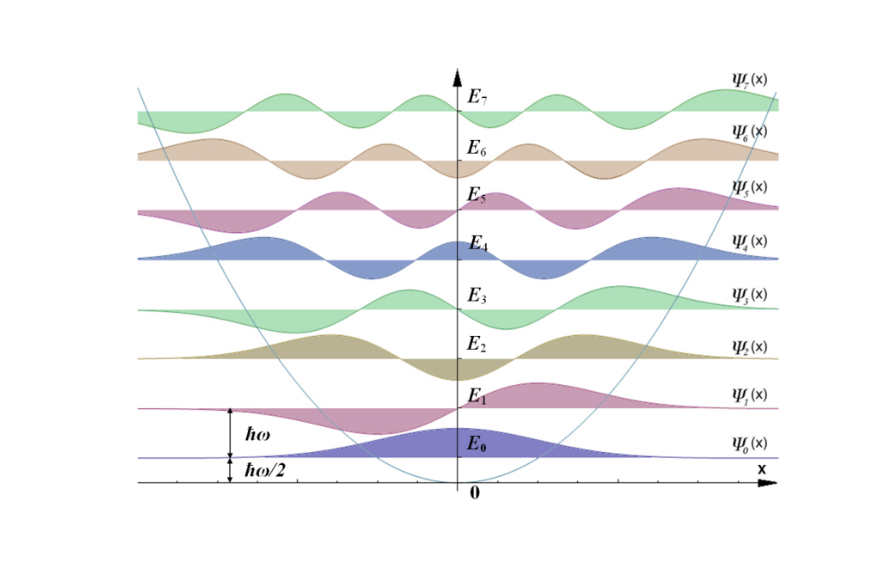

In [164]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 이미지 파일 경로
image_path = r"C:\Users\CDLC_johnh\PhysicalChemistry3\HarmOsziFunktionen.png"  # 경로를 다시 한번 확인해보세요.

# 이미지를 로드하고 표시
img = mpimg.imread(image_path)  # 이미지를 읽어옵니다.
plt.figure()
plt.imshow(img)  # 이미지를 표시합니다.
plt.axis('off')  # 축을 숨깁니다.
plt.show()  # 이미지를 표시합니다.

----

#### 재미있는 사실은 굳이 Hooke's Law로 생각하지 않아도 Quantum Harmonic Oscillator 결과를 얻을 수 있다는 것입니다.

#### Quantum Harmonic Oscillator의 위치에 대한 임의의 포텐셜함수가 있다고 가정해 봅시다.
#### 말은 안되지만 예시를 들기위해 그 포텐셜이 $ e^x $라고 해보죠 (우리는 어떤 함수 인지 모르는 것입니다~!)

#### 어떤 함수인지 모르니까 어떻게 해야할까요? 바로 Taylor's Expansion을 해보는 것입니다.

<IPython.core.display.Javascript object>


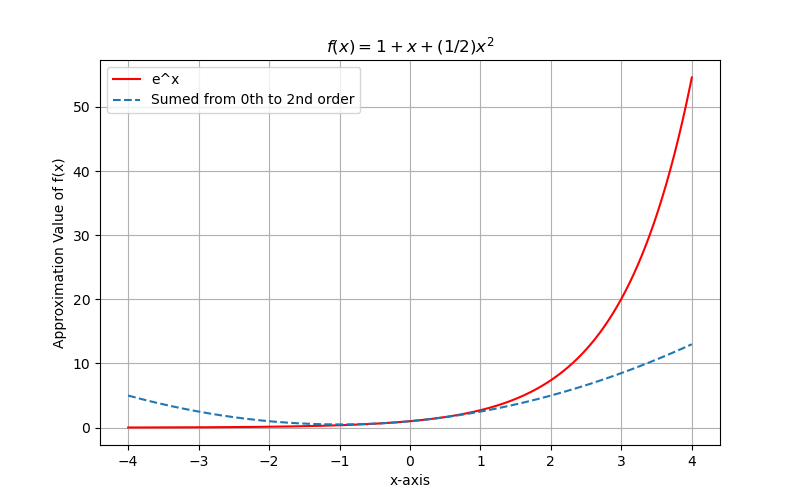

In [162]:
x_vals = np.linspace(-4,4, 10000)
y_vals = 1 + (x_vals) + (1/2) * ((x_vals)**2)

plt.figure(figsize=(8, 5))

plt.plot(x_vals, np.exp(x_vals), 'r', label="e^x")
plt.plot(x_vals,y_vals,'--', label='Sumed from 0th to 2nd order')

plt.xlabel('x-axis')
plt.ylabel('Approximation Value of f(x)')
plt.title('$ f(x) ={1} + x + (1/2)x^2$')
plt.legend()
plt.grid()
plt.show()

#### Quantum Harmonic Oscillator 는 테일러 급수의 2차 함수까지의 근사법이라고도 볼 수 있습니다. 이를 통해 분자의 진동운동을 설명하게 됩니다.

----

>이 자료의 저작권은 [johnh-230605, github]에게 있으며, 허가 없이 복제, 배포, 전송, 전시 등의 행위를 금지합니다.